In [378]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [379]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [380]:
df = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/somministrazioni-vaccini-latest.csv')
df.data_somministrazione = pd.to_datetime(df.data_somministrazione)

In [381]:
df.sort_values('data_somministrazione', inplace=True)

In [382]:
df.head()

,data_somministrazione,fornitore,area,fascia_anagrafica,sesso_maschile,sesso_femminile,categoria_operatori_sanitari_sociosanitari,categoria_personale_non_sanitario,categoria_ospiti_rsa,categoria_over80,prima_dose,seconda_dose
0,2020-12-27,Pfizer/BioNTech,ABR,20-29,1,0,1,0,0,0,1,0
96,2020-12-27,Pfizer/BioNTech,PIE,50-59,104,189,250,40,3,0,293,0
97,2020-12-27,Pfizer/BioNTech,PIE,60-69,94,37,113,9,9,0,131,0
98,2020-12-27,Pfizer/BioNTech,PIE,70-79,9,10,1,0,18,0,19,0
99,2020-12-27,Pfizer/BioNTech,PIE,80-89,5,19,0,0,24,0,24,0


In [383]:
df.data_somministrazione = df.data_somministrazione.dt.strftime("%d-%m-%Y")

In [384]:
df_pivot = (df.groupby(['data_somministrazione','fascia_anagrafica'])['prima_dose','seconda_dose'].sum().reset_index(level=0).
 pivot(columns='data_somministrazione', values='prima_dose').fillna(0))
df_pivot

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


data_somministrazione,01-01-2021,02-01-2021,03-01-2021,04-01-2021,05-01-2021,06-01-2021,07-01-2021,08-01-2021,09-01-2021,10-01-2021,...,19-01-2021,20-01-2021,21-01-2021,22-01-2021,23-01-2021,27-12-2020,28-12-2020,29-12-2020,30-12-2020,31-12-2020
fascia_anagrafica,,,,,,,,,,,,,,,,,,,,,
16-19,2.0,18.0,0.0,12.0,22.0,37.0,31.0,43.0,75.0,143.0,...,40.0,24.0,24.0,18.0,4.0,0.0,0.0,0.0,2.0,23.0
20-29,902.0,3451.0,3392.0,5809.0,6695.0,6515.0,7625.0,8805.0,8611.0,7320.0,...,2666.0,1831.0,1107.0,786.0,311.0,647.0,107.0,71.0,453.0,2330.0
30-39,1942.0,6788.0,6043.0,11852.0,13489.0,11193.0,14971.0,14894.0,13068.0,9793.0,...,3502.0,2715.0,1593.0,1137.0,460.0,1024.0,166.0,173.0,827.0,4212.0
40-49,2406.0,8297.0,7664.0,14321.0,16464.0,12748.0,18881.0,19051.0,15906.0,11349.0,...,4279.0,3611.0,1997.0,1517.0,521.0,1441.0,235.0,196.0,1185.0,5613.0
50-59,3172.0,10595.0,9966.0,19610.0,22702.0,17609.0,26239.0,26066.0,21887.0,15035.0,...,5412.0,4593.0,2531.0,1838.0,763.0,2114.0,276.0,274.0,1228.0,6977.0
60-69,1670.0,6378.0,5877.0,11728.0,13897.0,11706.0,15285.0,15365.0,16426.0,10548.0,...,3288.0,2650.0,1542.0,1086.0,641.0,1442.0,165.0,162.0,548.0,3467.0
70-79,183.0,592.0,526.0,1081.0,1536.0,1672.0,2203.0,2559.0,2905.0,2174.0,...,1648.0,1448.0,888.0,593.0,235.0,126.0,0.0,8.0,90.0,548.0
80-89,279.0,776.0,596.0,1349.0,1806.0,1512.0,2919.0,2884.0,2814.0,1650.0,...,3411.0,2797.0,1776.0,1068.0,418.0,114.0,1.0,9.0,158.0,998.0
90+,325.0,725.0,530.0,1234.0,1719.0,1385.0,2640.0,2503.0,2281.0,1279.0,...,2343.0,2067.0,1357.0,815.0,320.0,75.0,0.0,9.0,94.0,767.0


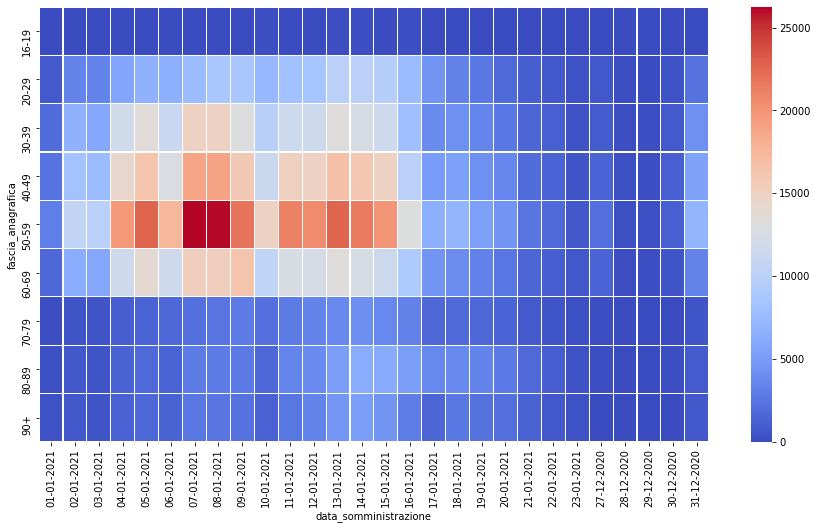

In [385]:

plt.figure(figsize=(15,8))
sns.heatmap(df_pivot, cmap='coolwarm', linecolor='white', linewidths=0.1)

In [386]:
daily = df.groupby('data_somministrazione')['prima_dose'].sum().reset_index()
df = df.merge(daily, left_on='data_somministrazione', right_on='data_somministrazione', how='inner', 
        suffixes=['','_totale_giorno'])

I need to groupby before calculating percentage as they are labelled by region as well

In [387]:
df1 = df.groupby(['data_somministrazione', 'fascia_anagrafica'])['prima_dose'].sum().reset_index(level=1).fillna(0)

In [388]:
df1 = df1.merge(daily, left_on='data_somministrazione', right_on='data_somministrazione', how='inner', 
        suffixes=['','_totale_giorno']).fillna(0)

In [389]:
df1['perc_tot_somministrati'] = (df1.prima_dose/df1.prima_dose_totale_giorno).mul(100).round(2)

In [390]:
df1_pivot = df1.pivot(columns='data_somministrazione',index='fascia_anagrafica',values='perc_tot').sort_index(ascending=False)

KeyError: 'perc_tot'

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df1_pivot, cmap='YlGn', linecolor='white', linewidths=0.1)

# Analisi Popolazione
Percentuale somministrazioni sul totale popolazione divisa per gruppi anagrafici

In [391]:
pd.read_html('https://www.tuttitalia.it/statistiche/popolazione-eta-sesso-stato-civile-2020/')[0]


Età Celibi/Nubili Coniugati/e   Vedovi/e Divorziati/e           Maschi  \
       Età Celibi/Nubili Coniugati/e   Vedovi/e Divorziati/e           Maschi   
0      0-4     2.264.538           0          0            0   1.163.19851,4%   
1      5-9     2.627.956           0          0            0   1.352.24051,5%   
2    10-14     2.835.060           0          0            0   1.460.44951,5%   
3    15-19     2.868.948       2.004         21           83   1.485.46551,7%   
4    20-24     2.890.840      64.253        127          668   1.549.02052,4%   
5    25-29     2.714.681     407.555        630        5.628   1.605.44451,3%   
6    30-34     2.084.313   1.169.221      2.418       26.489   1.658.74950,5%   
7    35-39     1.577.289   1.915.487      7.282       72.133   1.792.98150,2%   
8    40-44     1.393.337   2.620.552     18.957      154.618   2.089.19849,9%   
9    45-49     1.211.484   3.236.400     42.592      259.289   2.356.80049,6%   
10   50-54       914.381   3.545.692     84.717      331.914   2.404.14449,3%   
11   55-59       626.453   3.439.662    147.926      323.450   2.213.00848,8%   
12   60-64       411.731   3.006.985    230.387      244.247   1.874.92248,2%   
13   65-69       286.807   2.663.542    348.074      172.591   1.652.74047,6%   
14   70-74       225.584   2.429.874    544.701      124.201   1.555.30646,8%   
15   75-79       170.300   1.701.425    701.606       70.682   1.181.23344,7%   
16   80-84       140.403   1.162.123    888.727       40.283     930.78741,7%   
17   85-89        93.445     500.696    785.500       16.983     507.80936,4%   
18   90-94        46.534     129.439    434.772        5.615     179.13029,1%   
19   95-99        13.552      16.437    129.152        1.238      35.14121,9%   
20    100+         1.556         836     12.307          105       2.33215,8%   
21  Totale    25.399.192  28.012.183  4.379.896    1.850.217  29.050.09648,7%   

            Femmine             Totale          
            Femmine Unnamed: 7_level_1       %  
0    1.101.34048,6%          2.264.538    3,8%  
1    1.275.71648,5%          2.627.956    4,4%  
2    1.374.61148,5%          2.835.060    4,8%  
3    1.385.59148,3%          2.871.056    4,8%  
4    1.406.86847,6%          2.955.888    5,0%  
5    1.523.05048,7%          3.128.494    5,2%  
6    1.623.69249,5%          3.282.441    5,5%  
7    1.779.21049,8%          3.572.191    6,0%  
8    2.098.26650,1%          4.187.464    7,0%  
9    2.392.96550,4%          4.749.765    8,0%  
10   2.472.56050,7%          4.876.704    8,2%  
11   2.324.48351,2%          4.537.491    7,6%  
12   2.018.42851,8%          3.893.350    6,5%  
13   1.818.27452,4%          3.471.014    5,8%  
14   1.769.05453,2%          3.324.360    5,6%  
15   1.462.78055,3%          2.644.013    4,4%  
16   1.300.74958,3%          2.231.536    3,7%  
17     888.81563,6%          1.396.624    2,3%  
18     437.23070,9%            616.360    1,0%  
19     125.23878,1%            160.379    0,3%  
20      12.47284,2%             14.804    0,0%  
21  30.591.39251,3%         59.641.488  100,0%

In [392]:
pop = pd.read_html('https://it.wikipedia.org/wiki/Demografia_d%27Italia', thousands='.')[11]
pop = pop[['Età', 'Totale']]
pop.drop(index=101, axis=0, inplace=True)
pop.Totale = pd.to_numeric(pop.Totale)
pop.tail()

,Età,Totale
96,96 anni,30447
97,97 anni,22450
98,98 anni,15624
99,99 anni,10192
100,100 anni e più,15080


In [393]:
pop['Età'] = pd.to_numeric(pop['Età'].str.split(' ', expand=True)[0])

In [394]:
def ages(s):
    if (s['Età'] >= 0 and s['Età'] < 16):
        return '0-16'
    elif (s['Età'] >= 16 and s['Età'] <= 19):
        return '16-19'
    elif (s['Età'] >= 20 and s['Età'] <= 29):
        return '20-29'
    elif (s['Età'] >= 30 and s['Età'] <= 39):
        return '30-39'
    elif (s['Età'] >= 40 and s['Età'] <= 49):
        return '40-49'
    elif (s['Età'] >= 50 and s['Età'] <= 59):
        return '50-59'
    elif (s['Età'] >= 60 and s['Età'] <= 69):
        return '60-69'
    elif (s['Età'] >= 70 and s['Età'] <= 79):
        return '70-79'
    elif (s['Età'] >= 80 and s['Età'] <= 89):
        return '80-89'
    elif s['Età'] >= 90:
        return '90+'

In [395]:
def regrouping(s):
    if s['Età'] >= 0 | s['Età'] < 16:
        return '0-16'
    elif s['Età'] >= 16 | s['Età'] <= 19:
        return '16-19'
    elif s['Età'] >= 20 | s['Età'] <= 29:
        return '20-29'
    elif s['Età'] >= 30 | s['Età'] <= 39:
        return '30-39'
    elif s['Età'] >= 40 | s['Età'] <= 49:
        return '40-49'
    elif s['Età'] >= 50 | s['Età'] <= 59:
        return '50-59'
    elif s['Età'] >= 60 | s['Età'] <= 69:
        return '60-69'
    elif s['Età'] >= 70 | s['Età'] <= 79:
        return '70-79'
    elif s['Età'] >= 80 | s['Età'] <= 89:
        return '80-89'
    elif s['Età'] >= 90:
        return '90+'

In [396]:

pop['gruppo'] = pop.apply(ages, axis=1)

In [397]:
pop

,Età,Totale,gruppo
0,0,532991,0-16
1,1,542019,0-16
2,2,553729,0-16
3,3,561994,0-16
4,4,559203,0-16
...,...,...,...
96,96,30447,90+
97,97,22450,90+
98,98,15624,90+
99,99,10192,90+


In [398]:
pop = pop.groupby('gruppo')['Totale'].sum().reset_index()
pop.gruppo = pop.gruppo.astype(str)

In [399]:
pop

,gruppo,Totale
0,0-16,8885150
1,16-19,2310358
2,20-29,6327883
3,30-39,8345554
4,40-49,9567872
5,50-59,7871829
6,60-69,6860158
7,70-79,5628974
8,80-89,3117811
9,90+,518155


In [400]:
df1 = df1.merge(pop, left_on='fascia_anagrafica', right_on='gruppo', how='inner')
df1.drop('gruppo', axis=1, inplace=True)
df1.rename(columns={'Totale':'totale_fascia'}, inplace=True)
df1.head()

,data_somministrazione,fascia_anagrafica,prima_dose,prima_dose_totale_giorno,perc_tot_somministrati,totale_fascia
0,01-01-2021,16-19,2,10881,0.02,2310358
1,02-01-2021,16-19,18,37620,0.05,2310358
2,03-01-2021,16-19,0,34594,0.00,2310358
3,04-01-2021,16-19,12,66996,0.02,2310358
4,05-01-2021,16-19,22,78330,0.03,2310358


In [401]:
df2 = (df1.groupby(['data_somministrazione','fascia_anagrafica'])['prima_dose']
 .sum().groupby(level=0).cumsum().reset_index()
.merge(pop, left_on='fascia_anagrafica', right_on='gruppo')).drop(['gruppo'], axis=1)
df2.tail()

,data_somministrazione,fascia_anagrafica,prima_dose,Totale
246,27-12-2020,90+,6983,518155
247,28-12-2020,90+,950,518155
248,29-12-2020,90+,902,518155
249,30-12-2020,90+,4585,518155
250,31-12-2020,90+,24935,518155


In [402]:
df_last = df1.groupby('fascia_anagrafica')[['prima_dose','totale_fascia']].agg({'prima_dose':'sum','totale_fascia':'last'}).reset_index()

In [407]:
df_last['perc_vaccinata'] = (df_last.prima_dose/df_last.totale_fascia).mul(100).round(2)

In [408]:
df_last

,fascia_anagrafica,prima_dose,totale_fascia,perc_vaccinata
0,16-19,1306,2310358,0.06
1,20-29,131169,6327883,2.07
2,30-39,196654,8345554,2.36
3,40-49,246137,9567872,2.57
4,50-59,331333,7871829,4.21
5,60-69,203743,6860158,2.97
6,70-79,45891,5628974,0.82
7,80-89,65581,3117811,2.10
8,90+,50372,518155,9.72
